Confidence intervals provide an upper and lower expectation for the real observation. These can be useful for assessing the range of real possible outcomes for a prediction and for better understanding the skill of the model.

## ARIMA forecat

ARIMA fit (statsmodel) return ARIMA results object which
has forecast() function which results.

- Forecast. The forecasted value in the units of the training time series.
- Standard error. The standard error for the model.
- Confidence interval. The 95% confidence interval for the forecast.

In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
sales = pd.read_csv(r"./Datasets/shampoo.csv",index_col=0)
dates = pd.date_range(start="1901-01-01",freq='M',periods=len(sales))
sales.index = dates

RMSE : 83.417


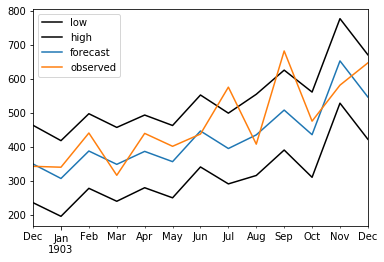

In [2]:
train , test = (sales.iloc[:int(len(sales)*.66)]
                ,sales.iloc[int(len(sales)*.66):])
# Walk - forward forecast
# we will iterate over test
# sample and add the 
predictions_list = []
ci_interval = []
saleslist = sales.shift(1).dropna().values
for ind in range(len(train),len(saleslist)+1):
    fit = ARIMA(saleslist[:ind],order=(5,1,0)).fit()
    predictions_list.append(fit.forecast()[0][0])
    ci_interval.append(fit.forecast()[2][0])
predictions = pd.Series(predictions_list,index=test.index)
rmse = pd.np.sqrt(mean_squared_error(predictions,test))
print("RMSE : {:.3f}".format(rmse))
forecast = pd.concat([predictions,test],1)
forecast.columns = ['forecast','observed']
ci_interval = pd.DataFrame(ci_interval,columns=['low','high'],index=forecast.index)
ax = ci_interval[['low','high']].plot(color='k')
_=forecast.plot(ax=ax)
## black lines are the forecast interval